In [1]:
from nixtlats import NixtlaClient
import os

nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = os.getenv("NIXTLATS_API_KEY")
)

# checking if the API key is valid
nixtla_client.validate_api_key()

INFO:nixtlats.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io sharing this response and ID: 2CWT8FTNNE


True

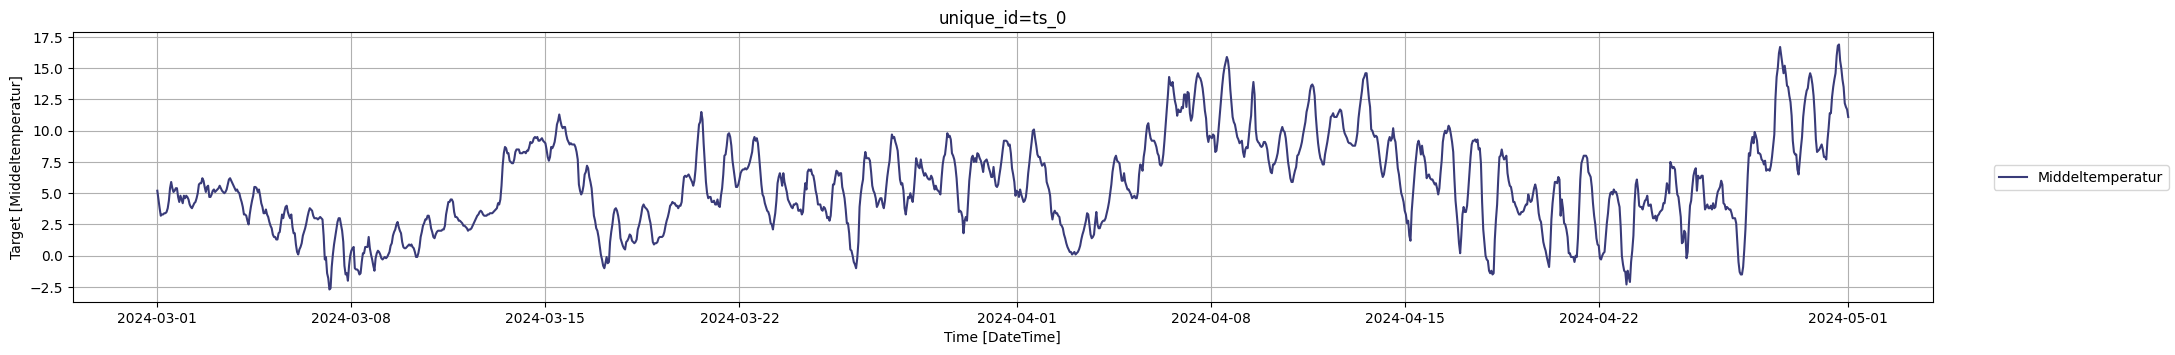

In [4]:
import pandas as pd 

all_data = pd.read_csv(os.path.join('..','data','weather', 'AarhusSydObservations', 'weatherAarhusSyd_Marts_april.csv'))

# remove variables from all the data (not necessary, just nice)
variables_to_remove = ['Luftfugtighed', 'Nedbør', 'Nedbørsminutter', 'Maksimumtemperatur', 'Minimumtemperatur', 'Skyhøjde', 'Middelvindhastighed', 'Skydække', 'Højeste vindstød']
all_data = all_data.drop(variables_to_remove, axis=1)


# plotting all data
nixtla_client.plot(all_data, time_col='DateTime', target_col='Middeltemperatur')

#### Finetuning TIMEGPT

In [8]:
import pandas as pd

dataset = all_data
train_size = 1008
test_size = 250
horizon = 50
model_type = 'timegpt-1-long-horizon' # 'timegpt-1' or 'timegpt-1-long-horizon'
target_column = 'Middeltemperatur'
time_column = 'DateTime'
freqency = 'H'

def rolling_origin_forecast(train_size, test_size, horizon, dataset, time_column, target_column, freqency, model_type):
    all_predictions = []
    for start in range(train_size, (train_size+test_size) - horizon + 1):
        train_df = dataset.iloc[:start]

        # Predict the next 10 rows
        forecast_df = nixtla_client.forecast(
            df=train_df,
            h=horizon,
            finetune_steps = 2,
            time_col=time_column,
            target_col=target_column,
            freq=freqency,
            model=model_type,
        )

        # get the actual values for the prediction window
        actual_df = dataset.iloc[start:start + horizon][['DateTime', 'Middeltemperatur']]

        # Concatenate the actual and prediction dataframes
        results = forecast_df.copy()
        results['Actual'] = actual_df['Middeltemperatur'].values

        # Save the results in the list
        all_predictions.append(results)
    
    return all_predictions

results = rolling_origin_forecast(train_size, test_size, horizon, dataset, time_column, target_column, freqency, model_type)

results_df = pd.concat(results)
results_df['RollingOrigin'] = [i for i in range(len(results)) for _ in range(horizon)]

# save the results
results_df.to_csv(os.path.join('results', 'weather_data' f'train_{train_size}_test_{test_size}_horizon_{horizon}_weather__WITH_FINETUNING_results.csv'), index=False)

INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client: